In [1]:
from neural_flow.utils import (
    rational_quadratic_spline_forward,
    rational_quadratic_spline_inverse,
    normalize_spline_params,
    squareplus,
)
import matplotlib.pyplot as plt
import numpy as np
from jax.nn import softplus

Compare squareplus activation with softplus activation.

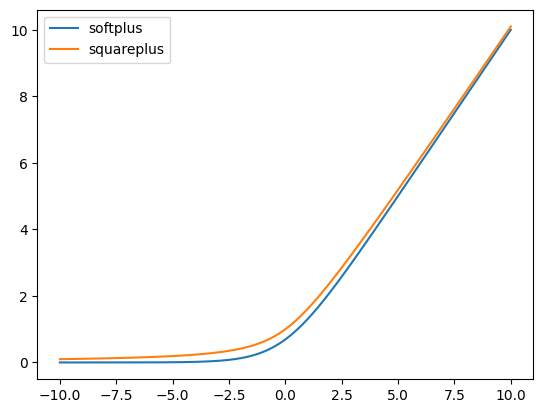

In [2]:
x = np.linspace(-10, 10, 1000)

plt.plot(x, softplus(x), label="softplus")
plt.plot(x, squareplus(x), label="squareplus")
plt.legend();

Check that spine transform works properly, also outside the [0, 1] interval.

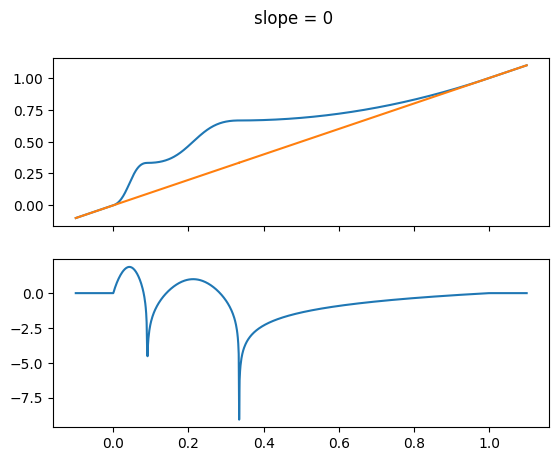

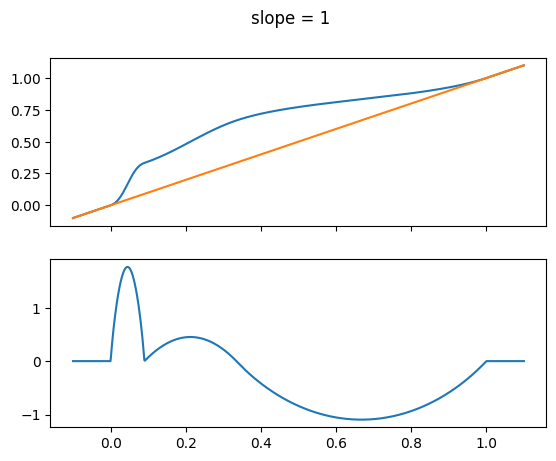

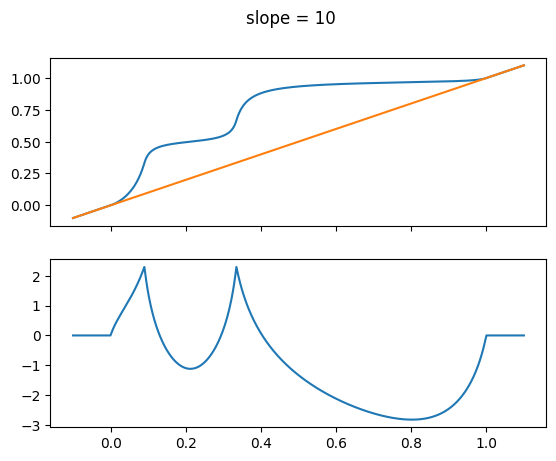

In [3]:
x = np.linspace(-0.1, 1.1, 1000).reshape(1000, 1)

knots = 3
dx, dy, slope = normalize_spline_params(
    np.arange(knots) - 3, np.zeros(knots), np.zeros(knots - 1)
)

nx = np.prod(x.shape)
dx = np.tile(dx, nx).reshape(*x.shape, -1)
dy = np.tile(dy, nx).reshape(*x.shape, -1)
slope = np.tile(slope, nx).reshape(*x.shape, -1)

for sl in (0, 1, 10):
    slope1 = sl * slope
    fig, ax = plt.subplots(2, 1, sharex=True)
    y, log_det = rational_quadratic_spline_forward(x, dx, dy, slope1)
    x2 = rational_quadratic_spline_inverse(y, dx, dy, slope1)
    plt.suptitle(f"slope = {sl}")
    ax[0].plot(x.reshape(-1), y.reshape(-1))
    ax[0].plot(x.reshape(-1), x2.reshape(-1))
    ax[1].plot(x.reshape(-1), log_det)

Check that spline transform is approximately the identity if spline parameters are normally distributed around zero with small variance.

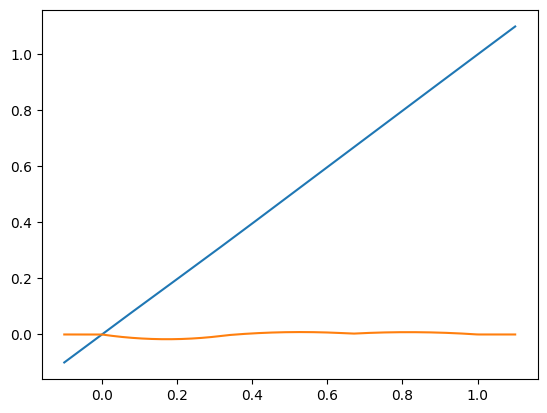

In [4]:
rng = np.random.default_rng(1)

x = np.linspace(-0.1, 1.1, 1000).reshape(1000, 1)

scale = 0.01
knots = 3
dx, dy, slope = normalize_spline_params(
    scale * rng.normal(size=knots),
    scale * rng.normal(size=knots),
    scale * rng.normal(size=knots - 1),
)

nx = np.prod(x.shape)
dx = np.tile(dx, nx).reshape(*x.shape, -1)
dy = np.tile(dy, nx).reshape(*x.shape, -1)
slope = np.tile(slope, nx).reshape(*x.shape, -1)

y, log_det = rational_quadratic_spline_forward(x, dx, dy, slope)
plt.plot(x.reshape(-1), y.reshape(-1))
plt.plot(x.reshape(-1), log_det);